<a href="https://colab.research.google.com/github/Cynamon224/Zadania_z-_sieci_neuronowych/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>Linear regression introduction</h1>
<h2>
Deep learning classes<br>
</h2>
<h3>
This is a graded assignment<br>
</h3>
</center>

### Basic information
<ul>
    <li>This task is build of:
    <ul>
        <li>Descriptions (in the Markdown cells)
        <li>Already prepared fragments of code
        <li>The placeholders for your code
    </ul>
    <li>Your code should be entered in the `Code` cells. The places are marked by <b># ENTER YOUR CODE HERE</b> note.
    <li>Usually you should enter only a few lines of code. But if you think you need it, you may use as many lines and add as many new code cells as you wish.
    <li>You should solve the assignment in the defined order. It is often impossible to solve the next task, if you did not sove the previous one.
    <li>This assignment is graded. 
    <li>During the grading you may expect some questions. <b>Sending the code to the teacher is not sufficient for passing.</b>
</ul>

Here we import all the necessary libraries, and set some initial parameters.

In [ ]:
# The line below downloads the helper from github repository. 
# Uncomment it, if you are opening the notebook in Google Colab directly from the GitHub

!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LinearRegression/helper_linear_regression.py

--2022-03-02 09:16:02--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/LinearRegression/helper_linear_regression.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3936 (3.8K) [text/plain]
Saving to: ‘helper_linear_regression.py’

helper_linear_regre 100%[===================>]   3.84K  --.-KB/s    in 0s      

2022-03-02 09:16:03 (49.4 MB/s) - ‘helper_linear_regression.py’ saved [3936/3936]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import helper_linear_regression as hlp

%matplotlib inline

The cell below is used for generating the data.

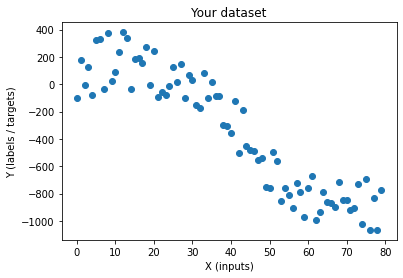

In [ ]:
# The line below assures that the random function will return the same values every time
np.random.seed(12)

coefs = [50, 25, -1.25, 0.01]
datalength = 80
noise = 0.2

x, y = hlp.getXY(coefs, datalength, noise)

f = plt.figure()
plt.scatter(x, y)
plt.title('Your dataset')
plt.xlabel('X (inputs)')
plt.ylabel('Y (labels / targets)');
plt.show()

### Task 1
Let's assume that your function is linear ($y = \Theta_0 + \Theta_1*x$). Try to select the $\Theta_0$ i  $\Theta_1$ manually in order to create your model. Use the code below for visualizing results.

*Note: This task is not about machine learning. You should just select the parameters manually, in order to get a good intuition. The parateres should be "quite good", but they do not have to be perfect.* 

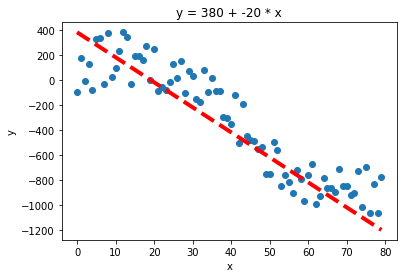

In [ ]:
my_th0 = 380 # ENTER YOUR CODE HERE (tune this parameter)
my_th1 = -20 # ENTER YOUR CODE HERE (tune this parameter)

hlp.plot_fitting_lin(x, y, my_th0, my_th1);

### Task 2  - Hypothesis
Prepare the function, which can compute the progosed values $h(x)$ according to the formula:

<center>
$h(x)  = \Theta_0 + \Theta_1 * x$
</center>

Function arguments:
<li>x - input data (vector)
<li>th0 - $\Theta_0$
<li>th1 - $\Theta_1$
<br \>
Function returns:
<li>h - vector of values computed with the formula above.

In [ ]:
def compute_h(x, th0, th1):
    x = np.asarray(x) # It removes problems with older version of libraries
    
    # ENTER YOUR CODE HERE

    h = th0+th1*x
    
    # END OF YOUR CODE
    return h

#### Task 2 - test code
You may use the code below, to test your output. The correct results are:<br>
[200 185 170 155 140 125 110  95  80  65]

In [ ]:
hlp.testcomputeh(compute_h)

Testing results:  [200 185 170 155 140 125 110  95  80  65]
Your code seems to be OK!


### Task 3 - Cost function
Prepare the function, which computes the cost, according to the formula:
<br /><br />
<center>
$J = \frac{1}{2m}\sum_{i=1}^{m}{(y_i - h(x_i))}^2$
</center>

Where:

<li>$J$ - cost
<li>$y$ - real $y$ values
<li>$y_{pred}$ - predicted $y$ values
<li>$m$ - length of the $y$ vector (number of observations)

Arguments:

<li>y - vector with real y values
<li>h - vector with predicted y values ($h(x)$)

Function returns:

<li> c - cost computed with the given formula.
    
    
*Note: You may compute the mean value of the vector by using: np.mean() function.
Example:*
<code>
X = [1, 2, 3]
print (np.mean(X))
2
</code>

In [ ]:
def cost(y, ypred):
    y = np.asarray(y) # It removes problems with older version of libraries
    ypred = np.asarray(ypred) # It removes problems with older version of libraries
    
    #ENTER YOUR CODE HERE
    
    c = 1/2*np.mean((y-ypred)**2)
    
    # END OF YOUR CODE
    return c

#### Task 4 - test code
You may test your `cost` function with the code below. If everything is OK, the output will be:<br>
**Your code seems to be OK!**

In [ ]:
hlp.testcost(cost)

Your code seems to be OK!


### Task 4 - Computing cost
Using the parameters $\Theta_0$ i $\Theta_1$ selected in the task 1 compute and display the hypothesis and the cost value.

*Note 1: Your parameters are stored in `my_th0` and `my_th1` variables.*<br>
*Note 1: You may use your `compute_h` function for computing hypothesis, and `cost` function for computing cost*<br>


In [ ]:
h = compute_h(x,my_th0,my_th1) # ENTER YOUR CODE HERE
mycost = cost(y,h)  # ENTER YOUR CODE HERE
print (mycost)

18926.081809540334


### Task 5 - partial derivatives
Prepare the function `compute_derivatives`, which returns the partial derivatives $\frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1)$ and $\frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1)$ where:
<center>
<br \><br \>
$J(\Theta_0, \Theta_1) = \frac{1}{2m}\sum_{i=1}^{m}{(y_i - h_\Theta(x_i))}^2= \frac{1}{2m}\sum_{i=1}^{m}{(y_i - (\Theta_0 + \Theta_1x_i))}^2$
<br \><br \>
$\frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1) = - \frac{1}{m}\sum_{i=1}^{m}{(y_i - h_\Theta(x_i))}$
<br \><br \>
$\frac{\delta}{\delta\Theta_1}J(\Theta_0, \Theta_1) = - \frac{1}{m}\sum_{i=1}^{m}{(y_i - h_\Theta(x_i))x_i}$
<br \><br \>
</center>

Arguments:
<li>x - input data vector
<li>y - output data (labels) vector
<li>th0 - $\Theta_0$ parameter
<li>th1 - $\Theta_1$ parameter
<br \>

Function returns:
<li>dTh0 - partial derivative $\frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1)$
<li>dTh1 - partial derivative $\frac{\delta}{\delta\Theta_1}J(\Theta_0, \Theta_1)$
<br \><br \>

In [ ]:
def compute_derivatives(x, y, th0, th1):
    x = np.asarray(x) # It removes problems with older version of libraries
    y = np.asarray(y) # It removes problems with older version of libraries
    
    # ENTER YOUR CODE HERE
    
    dTh0 = -np.mean(y-compute_h(x,th0,th1))
    dTh1 = -np.mean((y-compute_h(x,th0,th1))*x)
    
    #END OF YOUR CODE
    return dTh0, dTh1

#### Task 4 - test code
You may test your `compute_derivative` function with the code below. If everything is OK, the output will be:<br>
**dTh0 seems to be OK.**<br>
**dTh1 seems to be OK.**<br>

In [ ]:
hlp.testcomputederivatives(compute_derivatives)

dTh0 seems to be OK.
dTh1 seems to be OK.


### Task 6 - updating theta
Prepare the `update_theta` function, which updates the values of $\Theta$ parameters according to the formulas:
<center>
<br \><br \>
$\Theta_0 = \Theta_0 - \alpha * \frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1)$
<br \><br \>
$\Theta_1 = \Theta_1 - \alpha * \frac{\delta}{\delta\Theta_1}J(\Theta_0, \Theta_1)$
<br \><br \>
<br \><br \>
</center>

Arguments:
<li>th0 - $\Theta_0$ parameter
<li>th1 - $\Theta_1$ parameter
<li>del0 - Partial derivative $\frac{\delta}{\delta\Theta_0}J(\Theta_0, \Theta_1)$
<li>del1 - Partial derivative $\frac{\delta}{\delta\Theta_1}J(\Theta_0, \Theta_1)$
<li>learning_rate - the learning rate $\alpha$ parameter
<br \><br \>
Function returns:
<li>Updated value of $\Theta_0$
<li>Updated value of $\Theta_1$


In [ ]:
def update_theta(th0, th1, del0, del1, learning_rate):

    # ENTER YOUR CODE HERE
    
    th0 -= learning_rate*del0
    th1 -= learning_rate*del1
    
    # END OF YOUR CODE
    return th0, th1

#### Task 5 - test code
You may test your `update_theta` function with the code below. If everything is OK, the output will be:<br>
**theta0 seems to be OK.**<br>
**theta1 seems to be OK.**<br>

In [ ]:
hlp.testupdatetheta(update_theta)

theta0 seems to be OK.
theta1 seems to be OK.


### Task 7 - learning parameters
Tune the learning parameters and run the code below. This code will perform entire machine learning, using the functions you prepared in previous tasks.<br>
The parameters are as follows:
<ul>
    <li>learning_rate - $\alpha$ - learning coefficient. The greater $\alpha$ the larger change of $\Theta$ values in each iteration.
    <li>epochs - how many times we should repeat the iterations
</ul>
<br \>
Additional parameter:
<ul>
<li>display_every - how often should we display the $\Theta$ and cost values. This parameter does not play any role in learning process, it is only for observations. The value <code> display_every = int(epochs / 20) </code> is reasonable, but you may change it if you wish.
</ul>
    
    
*Note: The results for this part may differ because they depend on your parameters. To pass you need to push your cost below 15000. The optimal results are:*<br>
<li>$\Theta_0$ = 352.40171716
<li>$\Theta_1$ = -17.49921637
<li>$J(\Theta_0, \Theta_1)$ = 14725.144411377056
    
**WARNING: It is difficult to get the optimal parameters with this algorithm. If your cost $J(\Theta_0, \Theta_1)$ is below 14800 it means that you are ok. If your cost is below 14730 you are perfect :)**
    
    

Iteration 0, Theta 0: -0.32, Theta 1: -21.69, Cost: 153608.93
Iteration 3000, Theta 0: 182.38, Theta 1: -15.96, Cost: 21314.47
Iteration 6000, Theta 0: 270.42, Theta 1: -16.21, Cost: 15649.69
Iteration 9000, Theta 0: 312.87, Theta 1: -16.79, Cost: 14925.77
Iteration 12000, Theta 0: 333.34, Theta 1: -17.15, Cost: 14771.46
Iteration 15000, Theta 0: 343.21, Theta 1: -17.33, Cost: 14735.91
Iteration 18000, Theta 0: 347.97, Theta 1: -17.42, Cost: 14727.65
Iteration 21000, Theta 0: 350.26, Theta 1: -17.46, Cost: 14725.73
Iteration 24000, Theta 0: 351.37, Theta 1: -17.48, Cost: 14725.28
Iteration 27000, Theta 0: 351.90, Theta 1: -17.49, Cost: 14725.18
Iteration 30000, Theta 0: 352.16, Theta 1: -17.49, Cost: 14725.15
Iteration 33000, Theta 0: 352.29, Theta 1: -17.50, Cost: 14725.15
Iteration 36000, Theta 0: 352.35, Theta 1: -17.50, Cost: 14725.14
Iteration 39000, Theta 0: 352.37, Theta 1: -17.50, Cost: 14725.14
Iteration 42000, Theta 0: 352.39, Theta 1: -17.50, Cost: 14725.14
Iteration 45000, 

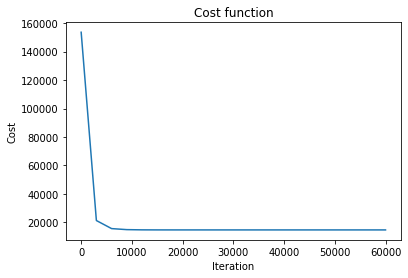

In [ ]:
learning_rate = 0.0009547 # ENTER YOUR CODE HERE (Tune this parameter)
epochs = 60000 # ENTER YOUR CODE HERE (Tune this parameter)
#learning_rate=0.000955 # tu już koszt leci w góre
#epochs=60000

display_every = int(epochs / 20)

th0 = 0 #The initial th0 value
th1 = 0 #The initial th1 value

cost_list = [] # we will use this list to plot the cost function chart
iter_list = [] # we will use this list to plot the cost function chart

for i in range(epochs):
    #Learning process. With your functions the entire learning code is only 2 lines
    del0, del1 = compute_derivatives(x, y, th0, th1)
    th0, th1 = update_theta(th0, th1, del0, del1, learning_rate)
    
    #This code is used only for displaying results. You do not need to understand it
    if ((i%display_every) == 0) | (i == epochs-1):
        curr_cost = cost(y, compute_h(x, th0, th1))
        cost_list.append(curr_cost)
        iter_list.append(i)
        print('Iteration {}, Theta 0: {:.2f}, Theta 1: {:.2f}, Cost: {:.2f}'
              .format(i, th0, th1, curr_cost))

        
#This code is used only for displaying results. You do not need to understand it
f = plt.figure()
plt.plot(iter_list, cost_list)
plt.title("Cost function")
plt.xlabel('Iteration')
plt.ylabel('Cost');

You may use the code below to present your results on the chart


Your results:
h(x) = 352.40 + x*-17.50
Cost = 14725.14


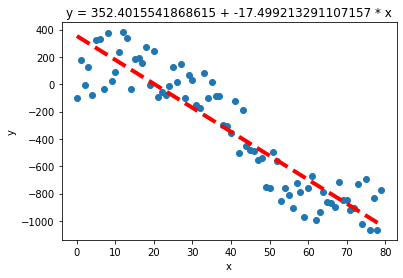

In [ ]:
print('\nYour results:')
print ('h(x) = {:.2f} + x*{:.2f}'.format(th0, th1))
print('Cost = {:.2f}'.format(cost(y, compute_h(x, th0, th1))))

hlp.plot_fitting_lin(x, y, th0, th1);

### Question 1
Compare the 'manual' results with the 'gradient descent' results using the code below. Which results are better:

In [ ]:
print('The gradient descent results:')
print ('h(x) = {:.2f} + x*{:.2f}'.format(th0, th1))
print('Cost = {:.2f}'.format(cost(y, compute_h(x, th0, th1))))

print('\nThe manual results:')
print ('h(x) = {:.2f} + x*{:.2f}'.format(my_th0, my_th1))
print('Cost = {:.2f}'.format(cost(y, compute_h(x, my_th0, my_th1))))
print('\n')


The gradient descent results:
h(x) = 352.40 + x*-17.50
Cost = 14725.14

The manual results:
h(x) = 380.00 + x*-20.00
Cost = 18926.08




**ENTER YOUR ANSWER HERE:**



In [ ]:
#Lepsze rezultaty
#The gradient descent results:
#h(x) = 352.40 + x*-17.50
#Cost = 14725.14